In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Домашнее задание по курсу анализа данных
Версия от 12.10.2021

Всего 50 баллов = 40 основных + 10 дополнительных

**Оценка**  = (Количество баллов за работу*2 + 20)/10

**Мягкий дедлайн: 18.12.2021  23:59**

**Жесткий дедлайн: 20.12.2021  8:59**

Присылать решение ссылкой на ваш **github** в телеграмм **@Aleron75** или на почту **milenkin.aa@phystech.edu**

**Автор:** Миленькин Александр

In [3]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head()

Размеры датасета (6000, 9)


was_married  children        salary  sex   age     profession  \
id                                                                  
0             1       4.0  4.420530e+07    1  82.0       Engineer   
1             1       2.0  1.737490e+08    1  32.0         Doctor   
2             1       6.0  2.489055e+08    1  14.0  Entertainment   
3             0       1.0  1.268718e+08    0  10.0         Lawyer   
4             1       9.0  8.596042e+07    1  99.0         Artist   

       home_cost  drive_info  happyness  
id                                       
0   1.003674e+07         NaN   0.727499  
1   1.014051e+07         0.0   0.383234  
2   1.043318e+07         NaN   0.432142  
3   1.004299e+07         NaN   0.377987  
4   1.021908e+07         NaN   0.657579

<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет и, используя класстерный анализ, разбить пользователей на сегменты. Сделать выводы о причинах такой кластеризации.

# Чистка датасета (5 баллов)
* Есть ли дубли в данных? Если есть удалить.
* Найти и удалить выбросы по признаку `home_cost`. (Их не больше 15-х, не меньше 3-х)

In [4]:
#Удаляем повторные данные
data = data.drop_duplicates()

In [5]:
#Так как у нас есть данные с одинковым id, удалим их
data = data[~data.index.duplicated()]

<AxesSubplot:>

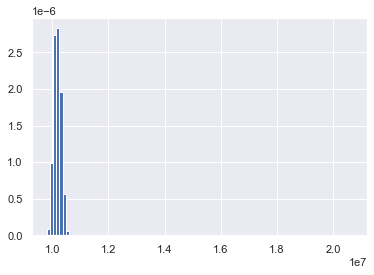

In [6]:
data.home_cost.hist(bins=100, density=True)

In [7]:
 #Получим индексы выбросов
rule1 = data['home_cost']>1.053e7
rule2 = data['home_cost']<0.985e7
tr = data[rule1 | rule2]
tr.index

Int64Index([173, 714, 1140, 1779, 1825, 2070, 2966, 3307, 3380, 3912, 4014,
            4365, 4727],
           dtype='int64', name='id')

In [8]:
df = data.drop(tr.index, axis=0)

In [9]:
df = df.reset_index()

<AxesSubplot:>

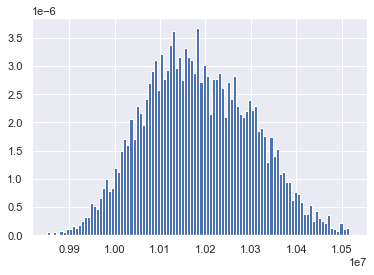

In [10]:
df['home_cost'].hist(bins=100, density=True)

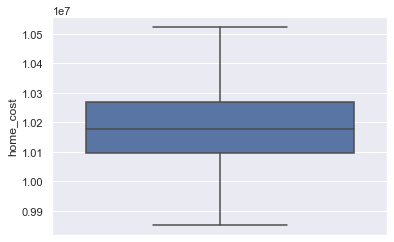

In [11]:
sns.boxplot(data=df, y="home_cost");

# Проверка гипотез (15 баллов)

<div class="alert alert-info">

<b>Описание заданий раздела:</b>    
    
В этом разделел вам предстоит:
* Проверить предложенные утверждения визуально.
* Применить подходящий статистический критерий, чтобы окончательно доказать или опровергнуть гипотезы на снове этих данных.

<div class="alert alert-warning">
    
* Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?

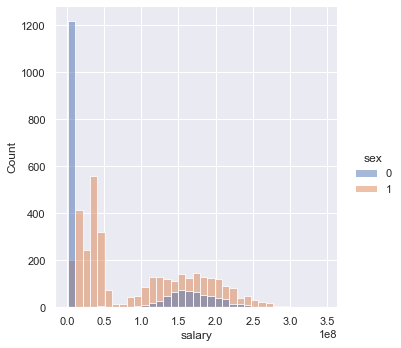

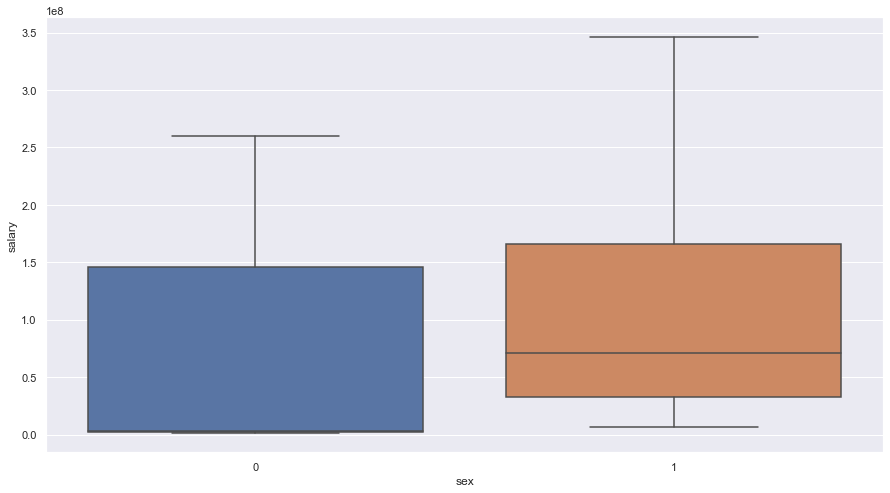

In [12]:
sns.displot(df, x='salary', hue ='sex', bins=35)


plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="sex", y="salary");

In [13]:
#Проверим гипотезу о том, что женщины в среднем имеют более высокую зарплату, чем мужчины
Male_salary = df[df['sex']==1]['salary']
Female_salary = df[df['sex']==0]['salary']

#Так как распределение не похоже на нормальное, то берем критерий Манна-Уитни
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(Male_salary, Female_salary) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05

if p < alpha:
    print('Выборки отличаются!')

Statistics=4994804.000, p=0.000
Выборки отличаются!


Неправда, в среднем мужчины зарабатывают больше женщин

<div class="alert alert-warning">
    
* Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

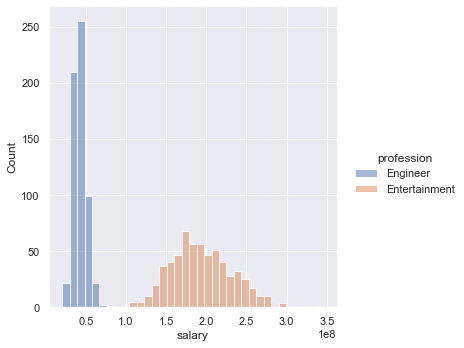

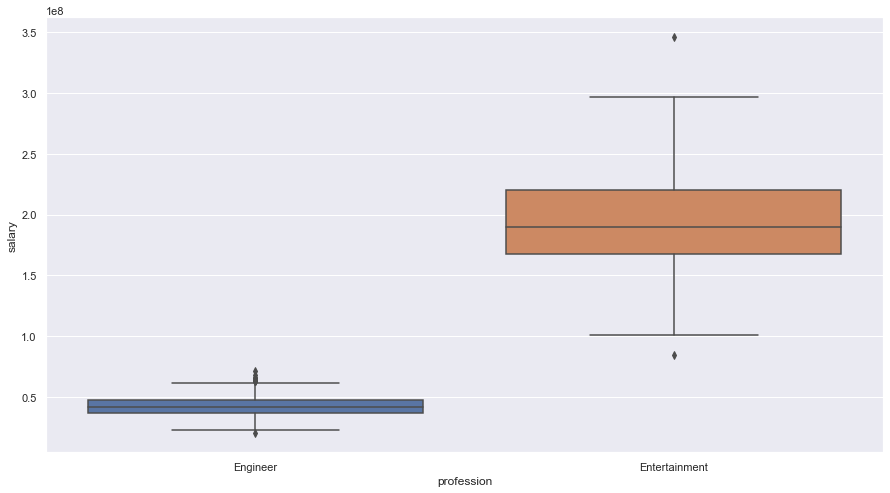

In [14]:
sub_data =  df[(df['profession']=='Engineer')|(df['profession']=='Entertainment')]

sns.displot(sub_data, x='salary', hue ='profession', bins=35)


plt.figure(figsize=(15, 8))
sns.boxplot(data=sub_data, x="profession", y="salary");

In [15]:
#Проверим гипотезу о том, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)
Engineer_salary = df[df['profession']=='Engineer']['salary']
Entertainment_salary = df[df['profession']=='Entertainment']['salary']

#Так как распределение похоже на нормальное, то берем Критерий Стьюдента

t, p_value  = scipy.stats.ttest_ind(Engineer_salary, Entertainment_salary) #Критерий Стьюдента (t-test)

print('p-value', p_value)


alpha = 0.05

if p_value < alpha:
    print('Выборки отличаются!')

p-value 0.0
Выборки отличаются!


Неправда, инженеры (Engineer) зарабатывают в среднем меньше, чем люди из сферы развлечений (Entertainment)

<div class="alert alert-warning">
    
* Правда ли, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей?

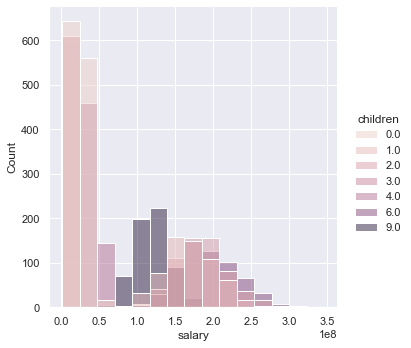

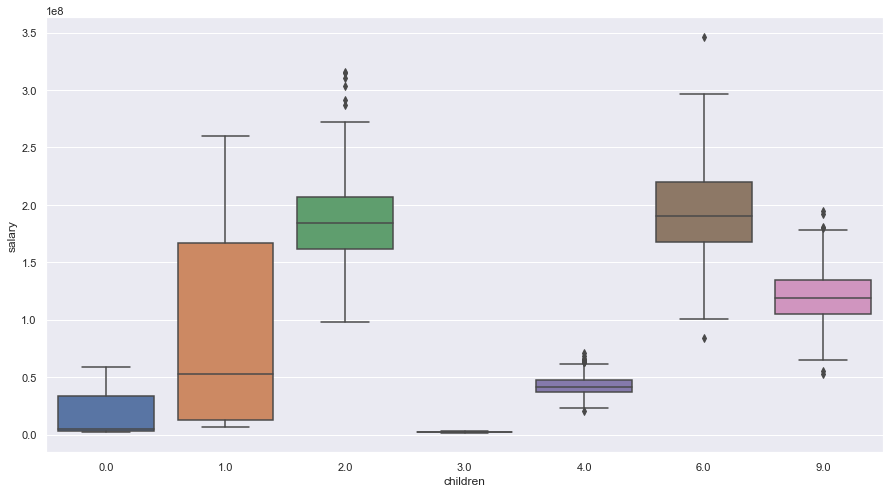

In [16]:
sns.displot(df, x='salary', hue ='children', bins=15)


plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="children", y="salary");

In [17]:
#По этим графикам мало что можно понять, поэтому добавим в датасет еще один столбец number_of_children
df['number_of_children'] = None

In [18]:
df['number_of_children'].iloc[df[df['children']<=3].index] = 'no_more_than_3'

In [19]:
df['number_of_children'].iloc[df[df['children']>3].index] = 'more_than_3'

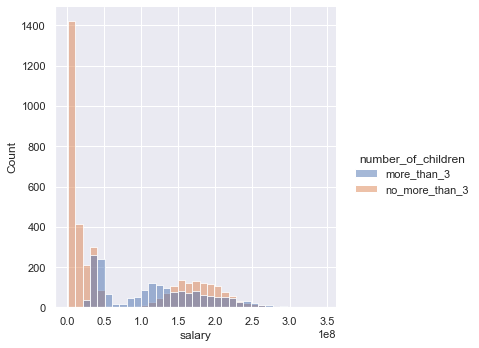

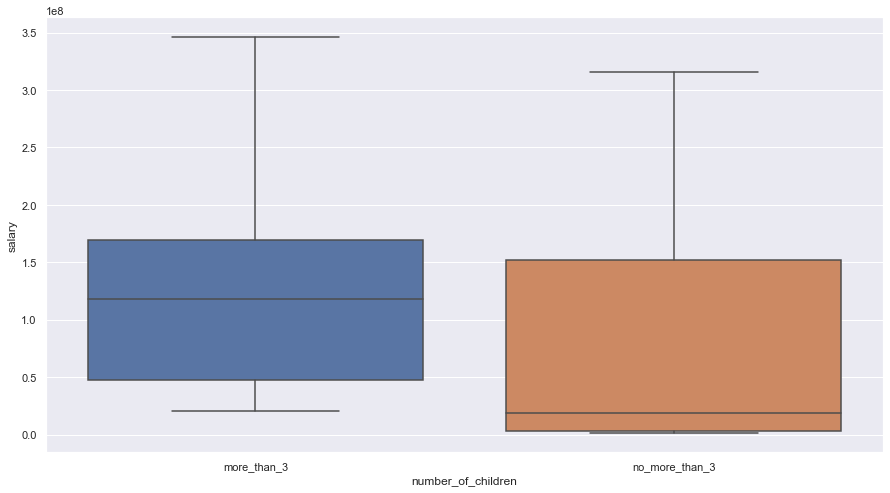

In [20]:
sns.displot(df, x='salary', hue ='number_of_children', bins=35)
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="number_of_children", y="salary");

In [21]:
#Проверим гипотезу о том, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей

#Так как распределение не похоже на нормальное, то берем критерий Манна-Уитни

stat, p = mannwhitneyu(df[df['children']>3]['salary'], df[df['children']<=3]['salary']) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05

if p < alpha:
    print('Выборки отличаются!')

Statistics=4909335.000, p=0.000
Выборки отличаются!


In [22]:
df = df.drop(['number_of_children'], axis=1)

Правда, те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей

<div class="alert alert-warning">
    
* Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?

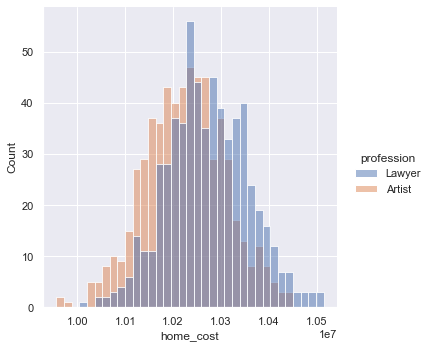

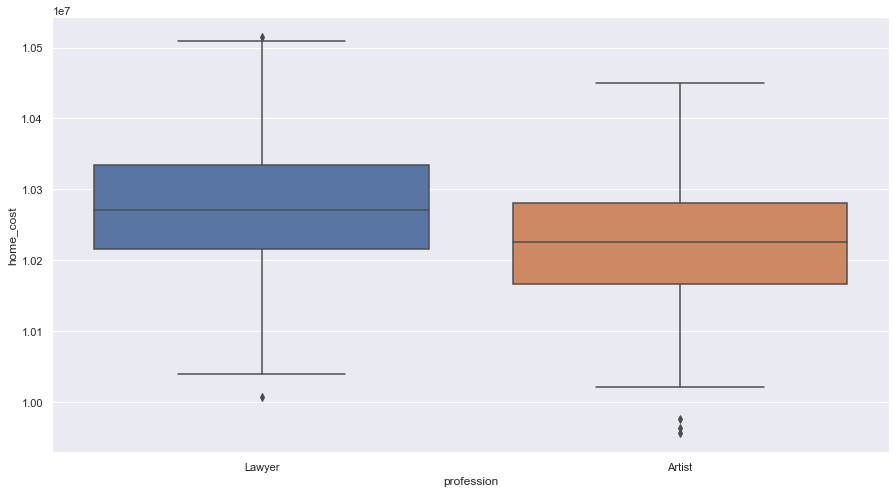

In [23]:
sub_data =  df[(df['profession']=='Artist')|(df['profession']=='Lawyer')]

sns.displot(sub_data, x='home_cost', hue ='profession', bins=35)


plt.figure(figsize=(15, 8))
sns.boxplot(data=sub_data, x="profession", y="home_cost");

In [24]:
#Проверим гипотезу о том, художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)
Artist_home = df[df['profession']=='Artist']['home_cost']
Lawyer_home = df[df['profession']=='Lawyer']['home_cost']

#Так как распределение похоже на нормальное, то берем Критерий Стьюдента

t, p_value  = scipy.stats.ttest_ind(Artist_home, Lawyer_home) #Критерий Стьюдента (t-test)

print('p-value', p_value)


alpha = 0.05

if p_value < alpha:
    print('Выборки отличаются!')

p-value 7.269892973343795e-22
Выборки отличаются!


Правда, художники (Artist) живут в домах, которые в среднем дешевле, чем дома адвокатов (Lawyer)

<div class="alert alert-warning">
    
* Прада ли, что недвижимость у бывавших в браке в среднем дороже, чем у не бывавших в браке?

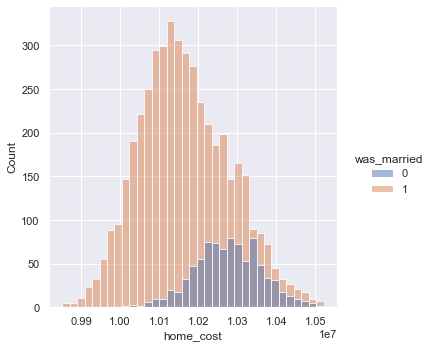

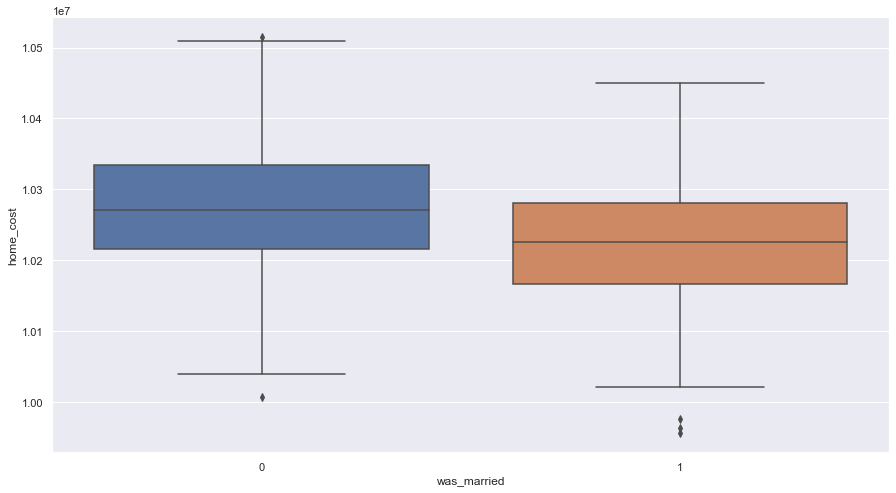

In [25]:
sns.displot(df, x='home_cost', hue ='was_married', bins=35)


plt.figure(figsize=(15, 8))
sns.boxplot(data=sub_data, x="was_married", y="home_cost");

In [26]:
#Проверим гипотезу о том, что недвижимость у бывавших в браке в среднем дороже, чем у не бывавших в браке
Married_home = df[df['was_married']==0]['home_cost']
No_married_home = df[df['was_married']==1]['home_cost']

#Так как распределение похоже на нормальное, то берем Критерий Стьюдента

t, p_value  = scipy.stats.ttest_ind(Married_home, No_married_home) #Критерий Стьюдента (t-test)

print('p-value', p_value)


alpha = 0.05

if p_value < alpha:
    print('Выборки отличаются!')

p-value 4.699128945429925e-149
Выборки отличаются!


Неправда, недвижимость у бывавших в браке в среднем дешевле, чем у не бывавших в браке

<div class="alert alert-warning">
    
* Прада ли, что мужчины в среднем чаще бывают в браке, чем женщины?

**Подсказка** - воспользуйтесь критерием хи-квадрат из библиотеки scipy

In [27]:
mask1 = df.sex == 0
mask2 = df.was_married == 0

In [28]:
d = {'Women': [df[mask1&mask2].shape[0], df[mask1&~mask2].shape[0]], 'Men': [df[~mask1&mask2].shape[0], df[~mask1&~mask2].shape[0]]}
table = pd.DataFrame(data=d, index=['wasn\'t_married', 'was_married'])

In [29]:
table

Women   Men
wasn't_married    609   259
was_married      1224  3395

In [30]:
chi, pval, dof, exp = scipy.stats.chi2_contingency(table.values) #Критерий Пирсона (хи квадрат)
  
significance = 0.05
print('p-value=%.6f, significance=%.2f\n' % (pval, significance))

print(pval)
if pval < significance:
    print("""На %.2f уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
            Они не независимы.""" % (significance))
    print('Мужчины в среднем чаще бывают в браке')
else:
    print("""На %.2f уровене значимости, мы принимаем нулевые гипотезы.  
            Они независимы.""" % (significance))

p-value=0.000000, significance=0.05

9.167186318901567e-138
На 0.05 уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
            Они не независимы.
Мужчины в среднем чаще бывают в браке


# Гипотезы при множественном тестировании (10 баллов)

In [31]:
# Подсказка: 
# - дисперсионнай анализ f_oneway()
# - Крускал Уоллиса

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Homemaker**, **Marketing**, **Healthcare** и **Executive** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием. 

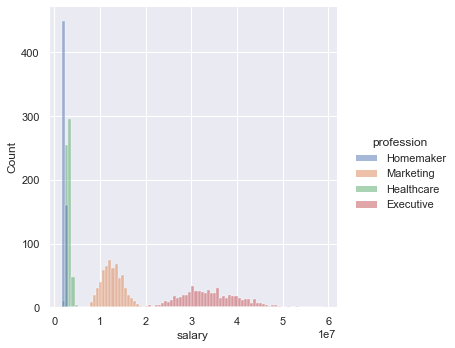

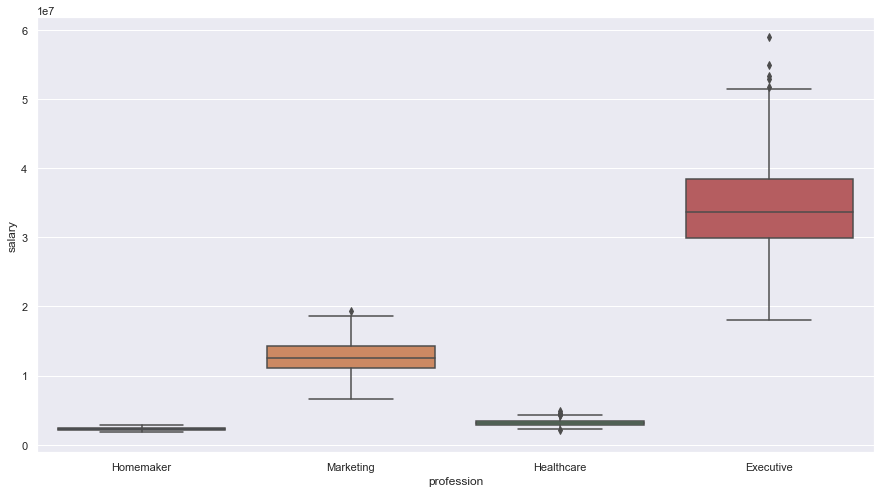

In [32]:
sub_data =  df[(df.profession=='Homemaker')|(df.profession=='Marketing')
               |(df.profession=='Healthcare')|(df.profession=='Executive')]

sns.displot(sub_data, x='salary', hue ='profession', bins=85)


plt.figure(figsize=(15, 8))
sns.boxplot(data=sub_data, x="profession", y="salary");

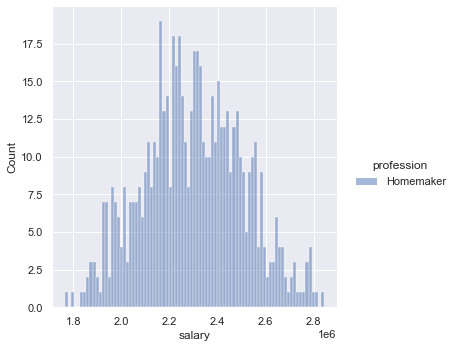

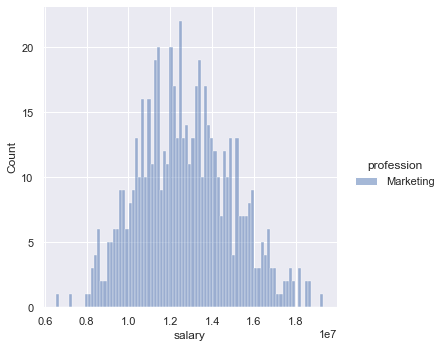

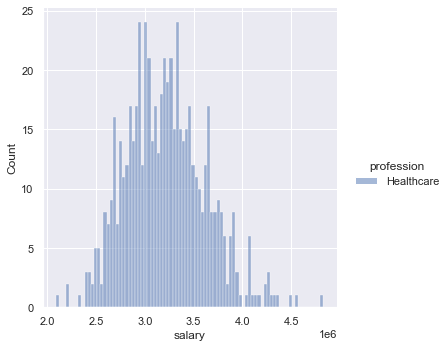

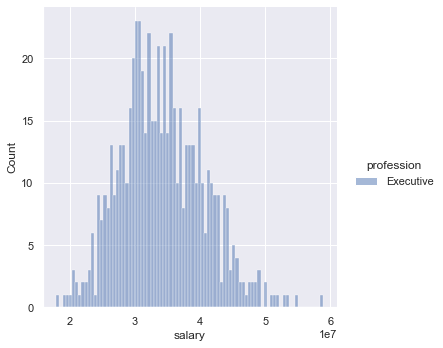

In [33]:
#На общем графике плохо видно распределение величин
for i in ['Homemaker', 'Marketing', 'Healthcare', 'Executive']:
    sub_data =  df[(df.profession==i)]

    sns.displot(sub_data, x='salary', hue ='profession', bins=85)

In [34]:
from scipy.stats import f_oneway

#Так как распределения похожи на нормальные, используем дисперсионнай анализ f_oneway()
fvalue, pvalue = f_oneway(df[df.profession=='Homemaker'].salary,  df[df.profession=='Marketing'].salary, 
                                df[df.profession=='Healthcare'].salary, df[df.profession=='Executive'].salary)

print(pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Группы статистически значимо отличаются')

0.0
Группы статистически значимо отличаются


Неправда, между представителями таких профессий как, Homemaker, Marketing, Healthcare и Executive в среднем зарплаты отличаются между собой

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Doctor**, **Entertainment** и **Lawyer** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием. 

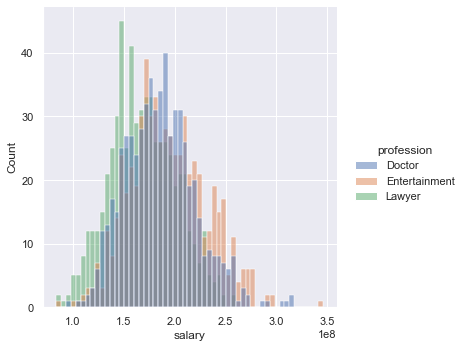

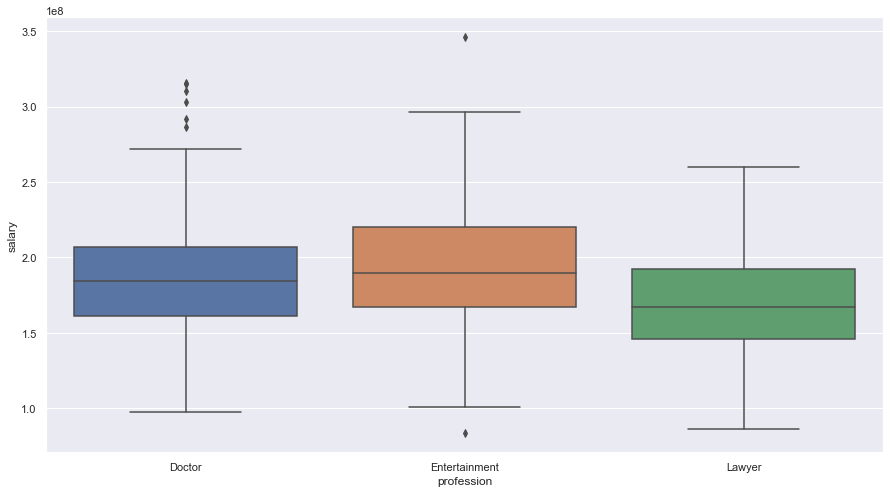

In [35]:
sub_data =  df[(df.profession=='Doctor')|(df.profession=='Entertainment')
               |(df.profession=='Lawyer')]

sns.displot(sub_data, x='salary', hue ='profession', bins=55)


plt.figure(figsize=(15, 8))
sns.boxplot(data=sub_data, x="profession", y="salary");

In [36]:
fvalue, pvalue = f_oneway(df[df.profession=='Doctor'].salary,  df[df.profession=='Entertainment'].salary, 
                                df[df.profession=='Lawyer'].salary)

print(pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Группы статистически значимо отличаются')

3.0782539431452083e-33
Группы статистически значимо отличаются


Неправда, между представителями таких профессий как, Doctor, Entertainment и Lawyer в среднем зарплаты отличаются между собой

# Регрессионный Анализ (20 баллов)

Взглянем от чего зависит уровень счастья

In [37]:
import statsmodels.formula.api as smf

# Рекомендации: 
# Используйте библиотку statsmodels для оценки вклада каждого фактора
# Выведения отчета о модели - model.summary()

<div class="alert alert-warning">
    
Выполните следующие задания и на основе результатов ответьте на вопросы:

* Постройте регрессионную модель зависимости уровня счастья от приведенных факторов (was_married, children, salary, sex, age, home_cost)
* Существует ли связь между уровнем счастья и зарплатой?

* Насколько сильны эти отношения?

* Как факт брака способствуют стоимости недвижимости?

* Зная влияние каждого фактора, можем ли мы предсказать уровень счастья?

* Постройте график зависимостей целевой переменной от приведенных числовых факторов. 
    
* Какие признаки не влияют на уровень счастья? (стат. значимость)
    
* Какой признак самый сильный?
    
* Постройте график остатков. Всю ли информацию смогла извлечь ваша модель из данных?

* Наблюдается ли гетероскедастичность в остатках?
    
* Есть ли в данных автокоррелированность?  

In [38]:
import statsmodels.api as sm
Y = df['happyness']
params = ['was_married', 'children', 'salary', 'sex', 'age', 'home_cost']
X = df[params]
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              happyness   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                          1.696e+04
Date:                Sun, 12 Dec 2021   Prob (F-statistic):                        0.00
Time:                        21:03:06   Log-Likelihood:                          4340.2
No. Observations:                5487   AIC:                                     -8668.
Df Residuals:                    5481   BIC:                                     -8629.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Если судить по постоенной выше регрессионной модели, то salary и home_cost меньше всего влияют на уровень счастья. А самый сильный признак это пол (sex). Недвижимость у бывавших в браке в среднем дешевле, чем у не бывавших в браке (этот результат был получен в предыдущей части). Зная влияние каждого фактора, мы можем предсказать уровень счастья (так как величина R-squared близка к единице). 

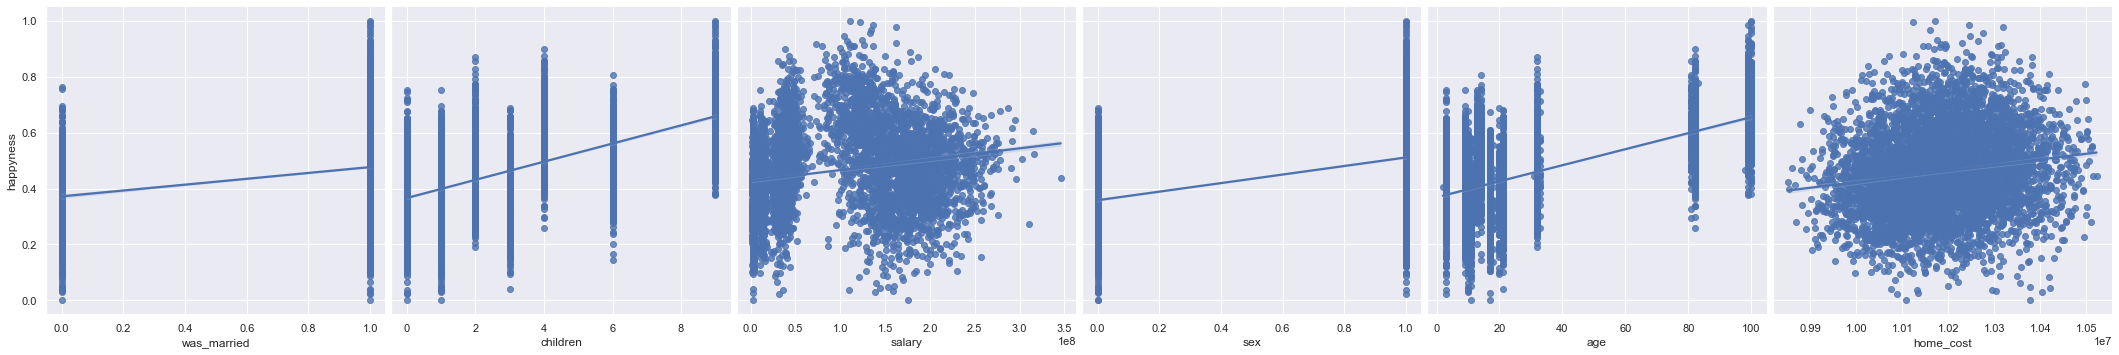

In [39]:
#Построим графики зависимости целевой переменной от приведенных числовых факторов
sns.pairplot(
    df, 
    y_vars='happyness', 
    x_vars=['was_married', 'children', 'salary', 'sex', 'age', 'home_cost'], 
    size=5,
    kind='reg',
    diag_kind=None
);

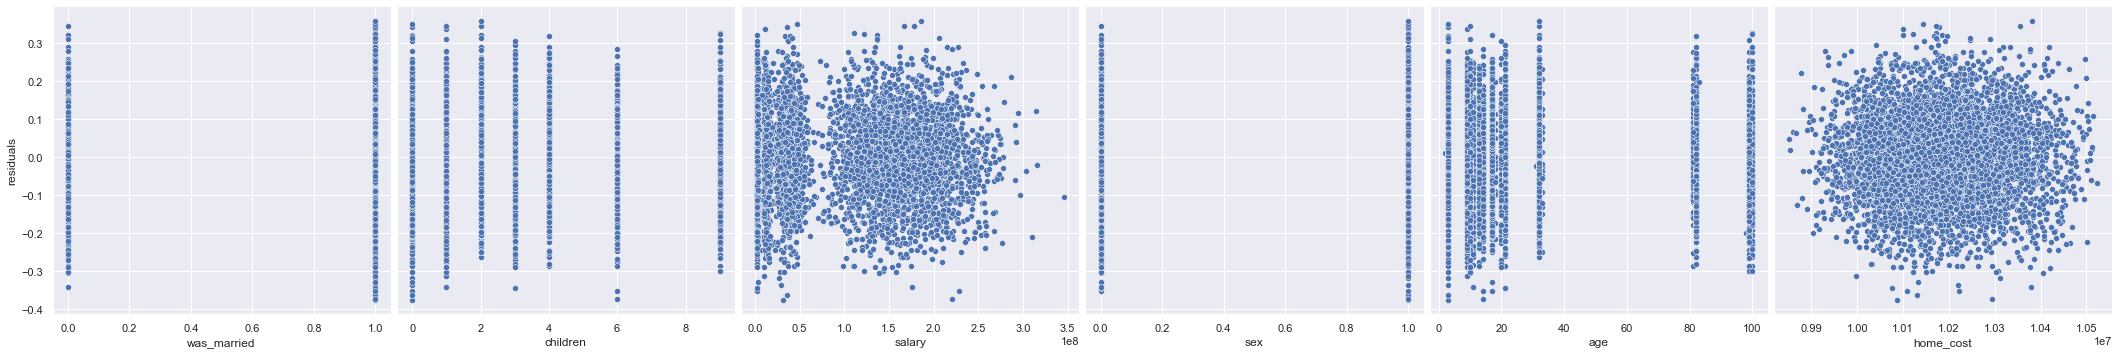

In [40]:
#Построим графики остатков
df['residuals'] = results.resid

sns.pairplot(
    df, 
    y_vars='residuals', 
    x_vars=params, 
    size=5,
    diag_kind=None
);

In [42]:
#Проверка на гетероскедастичность
from statsmodels.stats.diagnostic import het_breuschpagan
het_breuschpagan(results.resid, df[params].values)

(1826.3895043458708, 0.0, 455.7728319362803, 0.0)

Видно, что pvalue (последнее значение) нулевое. Гипотеза о гомоскедастичности отвергается.

Для проверки автокоррелированности достаточно посмотреть в протокол оценивания и найти там строчку Durbin-Watson. Это статистика Дарбина-Уотсона. Если она оказывается в районе двух, то автокоррелированности в остатках нет.

# Дополнительные баллы (+10 баллов)
* Аккуратный и понятный код **+5 баллов**
* Присутствуют лаконичные и понятные комментарии **+5 балов**